<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Time-Series-Modeling/Decomposing_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Decomposing time series

# Set up plots
%matplotlib inline
%config InclineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt 
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Install Quandl
!pip install --upgrade quandl

In [0]:
# Import libraries
import pandas as pd
import quandl

# Use the seasonal_decompose function from the statsmodels library to carry out the classical decomposition
# This indicates that we will either use either the additive or multiplicative model
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
# Enter the API key from your Quandl account
QUANDL_KEY = '{key}'
quandl.ApiConfig.api_key = QUANDL_KEY

In [0]:
# Download the gold prices data from Quandl
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',authtoken='ydsBxzS1GQRd5st6T5j3', start_date='2000-01-01', end_date='2011-12-31')

# Rename the Value column to price
df.rename(columns={'Value': 'price'}, inplace=True)

# There may be an entry for 2000-04-28 and 2000-04-30, both with the same value 
# So resampling to monthly data by only taking the last value takes care of duplicated data in the series
# Only take data from the last day of the month 
# This was done by resampling the data to a monthly frequency
# This gives us only one data point per month
# This process does not change any of the actual values
df = df.resample('M').last()

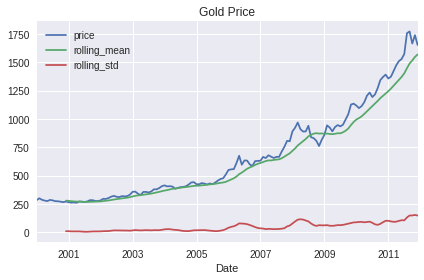

In [9]:
# Make the window size for the rolling statisitcs a 12 month time period 
WINDOW_SIZE = 12

# Calculate the rolling mean and rolling standard deviation of the data
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()

# Plot the gold price, rolling mean, and rolling standard deviation
df.plot(title='Gold Price')
plt.tight_layout()
plt.show()

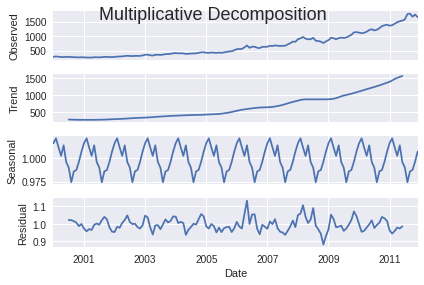

In [11]:
# Since the plot showed a non-linear rolling mean and the rolling standard deviation increased with time, we used the multiplicative model
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot() \
                     .suptitle('Multiplicative Decomposition', fontsize=18);
# The extracted component series gave the observed price, the general trend, the seasonal, and the random (residual)
# The residual plot was indeed random so the fit makes sense
# If an additive model was applied, there would have been an increasing pattern in the over time
# In this case, it looks like the variance in the residuals was slightly higher in the second half of the dataset

plt.tight_layout()
plt.show()